In [84]:
%matplotlib inline

Linear全联接层基础，模拟Tan函数。

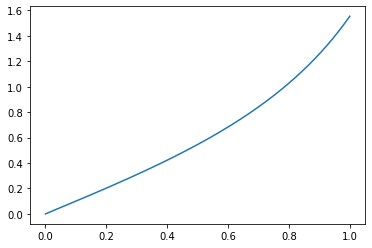

In [95]:
import math
import matplotlib.pyplot as plt

X = [i/1000 for i in range(0, 1000)]
Y = [math.tan(i) for i in X]

plt.plot(X, Y)

In [96]:
import torch
import torchvision
import torchvision.transforms as transforms


trainX = torch.Tensor([X])/1000
trainY = torch.Tensor([Y])

    

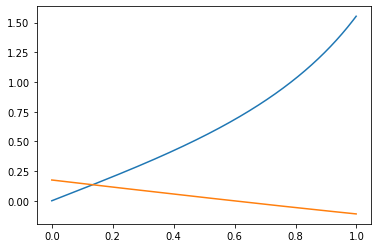

In [115]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

net = nn.Sequential(nn.Linear(1, 1))#无法模拟曲线
net = nn.Sequential(nn.Linear(1, 2), nn.Linear(2, 1))#无法模拟曲线
net = nn.Sequential(nn.Linear(1, 2), nn.Sigmoid(), nn.Linear(2, 1))
net = nn.Sequential(nn.Linear(1, 2), nn.ReLU(), nn.Linear(2, 1)) #无法模拟曲线
net = nn.Sequential(nn.Linear(1, 2), nn.ELU(), nn.Linear(2, 1)) #无法模拟曲线
net = nn.Sequential(nn.Linear(1, 2), nn.Softsign(), nn.Linear(2, 1)) #效果最好的
net = nn.Sequential(nn.Linear(1, 2), nn.LogSigmoid(), nn.Linear(2, 1))
net = nn.Sequential(nn.Linear(1, 2), nn.Tanh(), nn.Linear(2, 1))

net.eval()

P = [net(torch.Tensor([i])) for i in X]
plt.plot(X, Y)
plt.plot(X, P)

Epoch 0 loss=0.005440700799226761
Epoch 100 loss=0.00026259664446115494
Epoch 200 loss=0.00014135637320578098
Epoch 300 loss=9.428552584722638e-05
Epoch 400 loss=7.330731023102999e-05
Epoch 500 loss=6.244955147849396e-05
Epoch 600 loss=5.5808199249440804e-05
Epoch 700 loss=5.0920614739879966e-05
Epoch 800 loss=4.677731703850441e-05
Epoch 900 loss=4.300659566069953e-05


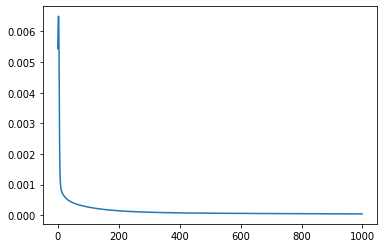

In [116]:
opt = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)
los = torch.nn.MSELoss()
net.train()
losss = []
EPOCHS = 1000
for e in range(EPOCHS):
    for x, y in zip(X, Y):
        x = torch.Tensor([x])
        y = torch.Tensor([y])
        out = net(x)
        opt.zero_grad()
        loss = los(out, y)
        loss.backward()
        opt.step()
    losss.append(loss.max())
    if e % (EPOCHS/10.0) == 0:
        print(f'Epoch {e} loss={loss.max()}')
plt.plot(losss)

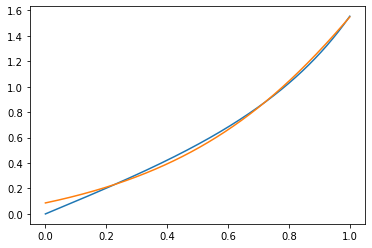

In [117]:
net.eval()

P = [net(torch.Tensor([i])) for i in X]
plt.plot(X, Y)
plt.plot(X, P)